In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import spacy

In [4]:
df = pd.read_excel("data/data/Product_Review_Case_Study_Data_Excel.xlsx",sheet_name="Sheet1")

In [5]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,...,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,...,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,...,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,...,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,...,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12817 entries, 0 to 12816
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  12817 non-null  object
 1   vendor               12817 non-null  object
 2   brand                12817 non-null  object
 3   sub_brand            12817 non-null  object
 4   category             12817 non-null  object
 5   segment              12817 non-null  object
 6   review               12785 non-null  object
 7   review_title         7801 non-null   object
 8   review_rating        12817 non-null  int64 
 9   review_website       12817 non-null  object
 10  review_data          12817 non-null  object
 11  review_data_created  12817 non-null  object
 12  review_id            12817 non-null  object
 13  verified             12817 non-null  bool  
 14  product_id           12817 non-null  int64 
 15  owner                12817 non-null  object
 16  base

In [7]:
df.columns

Index(['upc', 'vendor', 'brand', 'sub_brand', 'category', 'segment', 'review',
       'review_title', 'review_rating', 'review_website', 'review_data',
       'review_data_created', 'review_id', 'verified', 'product_id', 'owner',
       'base_size', 'c_flavors', 'c_form', 'c_lifestage', 'c_price_class',
       'run_date'],
      dtype='object')

In [8]:
sum(df["review_data"]==df["review_data_created"]) # values of both are same for same observation

12817

In [9]:
type(df["upc"][0])

str

##### review_data, review_data_created and run_date is in text format, need to convert these to date format. base_size is weight, so if needed we can convert it to intergers with same units.

In [10]:
df["upc"].unique() # what is this column- unique product code

array(['UPC 1', 'UPC 2', 'UPC 3', ..., 'UPC 1321', 'UPC 1322', 'UPC 1323'],
      dtype=object)

In [11]:
len(df["upc"].unique()) 

1323

In [12]:
df["vendor"].unique() #our client manufacturer A 
#6 manufacturers

array(['Manufacturer A', 'Manufacturer B', 'Manufacturer C',
       'Manufacturer D', 'Manufacturer E', 'Manufacturer F'], dtype=object)

In [13]:
df["vendor"].value_counts()

Manufacturer D    5264
Manufacturer A    2765
Manufacturer C    2065
Manufacturer B    1576
Manufacturer E     664
Manufacturer F     483
Name: vendor, dtype: int64

In [14]:
df["brand"].unique()

array(['Brand 1', 'Brand 2', 'Brand 3', 'Brand 4', 'Brand 5', 'Brand 6',
       'Brand 7', 'Brand 8', 'Brand 9', 'Brand 10', 'Brand 11',
       'Brand 12', 'Brand 13', 'Brand 14', 'Brand 15', 'Brand 16',
       'Brand 17', 'Brand 18', 'Brand 19', 'Brand 20', 'Brand 21',
       'Brand 22', 'Brand 23', 'Brand 24', 'Brand 25', 'Brand 26',
       'Brand 27', 'Brand 28', 'Brand 29', 'Brand 30', 'Brand 31',
       'Brand 32', 'Brand 33', 'Brand 34', 'Brand 35', 'Brand 36',
       'Brand 37', 'Brand 38'], dtype=object)

In [15]:
df["sub_brand"].unique()

array(['Sub Brand 1', 'Sub Brand 2', 'Sub Brand 3', 'Sub Brand 4',
       'Sub Brand 5', 'Sub Brand 6', 'Sub Brand 7', 'Sub Brand 8',
       'Sub Brand 9', 'Sub Brand 10', 'Sub Brand 11', 'Sub Brand 12',
       'Sub Brand 13', 'Sub Brand 14', 'Sub Brand 15', 'Sub Brand 16',
       'Sub Brand 17', 'Sub Brand 18', 'Sub Brand 19', 'Sub Brand 20',
       'Sub Brand 21', 'Sub Brand 22', 'Sub Brand 23', 'Sub Brand 24',
       'Sub Brand 25', 'Sub Brand 26', 'Sub Brand 27', 'Sub Brand 28',
       'Sub Brand 29', 'Sub Brand 30', 'Sub Brand 31', 'Sub Brand 32',
       'Sub Brand 33', 'Sub Brand 34', 'Sub Brand 35', 'Sub Brand 36',
       'Sub Brand 37', 'Sub Brand 38', 'Sub Brand 39', 'Sub Brand 40',
       'Sub Brand 41', 'Sub Brand 42', 'Sub Brand 43', 'Sub Brand 44',
       'Sub Brand 45', 'Sub Brand 46', 'Sub Brand 47', 'Sub Brand 48',
       'Sub Brand 49', 'Sub Brand 50', 'Sub Brand 51', 'Sub Brand 52',
       'Sub Brand 53', 'Sub Brand 54', 'Sub Brand 55', 'Sub Brand 56',
       'Sub Bra

In [16]:
df["category"].unique() # understand this

array(['Category 1', 'Category 2', 'Category 3'], dtype=object)

In [17]:
df["segment"].unique() # 7 segments # segments?

array(['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E',
       'Segment F', 'Segment G'], dtype=object)

In [18]:
df["review_title"].unique()

array(['No help', 'My cat is very', 'My cats loved this product!', ...,
       'The dogs are every bite and wanted more',
       'Brand 20 Puppy at its best', 'Cat did not like taste'],
      dtype=object)

In [19]:
df["review_rating"].unique()

array([2, 5, 4, 1, 3], dtype=int64)

In [20]:
df["review_rating"].value_counts()

5    9360
4    1906
3     795
1     495
2     261
Name: review_rating, dtype: int64

In [21]:
df[df["vendor"]=="Manufacturer A"][["review_rating"]].value_counts()

review_rating
5                2127
4                 327
1                 131
3                 117
2                  63
dtype: int64

In [22]:
df["review_website"].unique() # 9 websites

array(['Amazon', 'Petsmart', 'Walmart', 'Tractorsupply', 'Petco', 'Chewy',
       'Target', 'Kroger', 'Dollargeneral'], dtype=object)

In [23]:
# review data? review data created?

In [24]:
len(df["review_id"].unique()) # look at it #7189 unique reviews

7189

In [25]:
len(df["review"].unique())

7172

In [26]:
# review title 60% non null values

In [27]:
df["verified"].value_counts()

False    11878
True       939
Name: verified, dtype: int64

In [28]:
len(df["product_id"].unique()) #1385 products

1385

In [29]:
# 1323 unique UPC, 1385 unique product ids

In [30]:
df["owner"].unique()

array(['My Product', 'Competitor'], dtype=object)

In [31]:
df["owner"].value_counts() # 22% client's products(including duplicate values)

Competitor    10052
My Product     2765
Name: owner, dtype: int64

In [32]:
df["base_size"].unique() # find out about this column

array(['3 Ounce', '1.3 Ounce', '35 Pound', '11.5 Pound', '4 Pound',
       '6 Ounce', '20 Pound', '10 Pound', '3.5 Pound', '12 Ounce',
       '32 Pound', '20 Ounce', '8.5 Pound', '54 Ounce', '7 Pound',
       '96 Ounce', '5.5 Pound', '40 Pound', '21 Ounce', '24 Pound',
       '13 Ounce', '2 Ounce', '12.6 Ounce', '8 Ounce', '31.1 Pound',
       '22 Pound', '3 Pound', '5.5 Ounce', '3.8 Pound', '16 Pound',
       '28 Pound', '6.3 Ounce', '6.3 Pound', '30 Pound', '5 Pound',
       '42 Ounce', '6 Pound', '12 Pound', '5 Ounce', '15.5 Pound',
       '25 Ounce', '15 Pound', '23.1 Ounce', '176 Ounce', '30 Ounce',
       '28.5 Pound', '2.5 Pound', '36 Ounce', '18 Ounce', '12.7 Ounce',
       '1.75 Ounce', '6.35 Pound', '4.2 Ounce', '53 Ounce', '75 Ounce',
       '13 Pound', '16.5 Pound', '3.8 Ounce', '320 Ounce', '46.8 Pound',
       '10 Ounce', '2 Fluid Ounce', '8 Pound', '.5 Ounce', '4.9 Ounce',
       '11 Pound', '4.5 Pound', '3.5 Ounce', '16 Ounce', '14 Pound',
       '13.2 Ounce', '36 Pound

In [33]:
df["c_flavors"].unique() # not applicable category

array(['Other Fish Seafood', 'Chicken', 'Lamb', 'Salmon', 'Rem Flavor',
       'Turkey', 'Not Applicable', 'Nut', 'Venison', 'Beef', 'Tuna',
       'Bacon', 'Dairy', 'Duck', 'Pork', 'Rabbit', 'Boar',
       'Bison/buffalo', 'Fruit/vegetable', 'Liver', 'Other Poultry',
       'Other Organ', 'Novel Exotic'], dtype=object)

In [34]:
df["c_form"].unique() # not applicable category

array(['Loaf', 'Not Applicable', 'Crunchy', 'Clumping', 'Gravy',
       'Non-loaf', 'Real Meat', 'Litter System', 'Non-gravy',
       'Non Clumping', 'Alternative Litter', 'Liquid', 'Silica Gel',
       'Tender', 'Dental'], dtype=object)

In [35]:
df["c_lifestage"].unique() # not applicable category

array(['Adult', 'Puppy', 'All Life Stages', 'Not Applicable', 'Senior',
       'Kitten'], dtype=object)

In [36]:
df["c_price_class"].unique() # not applicable category

array(['Super Premium', 'Premium', 'Ultra', 'Pinnacle', 'Not Applicable',
       'Therapeutic', 'Value'], dtype=object)

In [37]:
df["c_price_class"].value_counts() # not applicable category

Not Applicable    5697
Super Premium     3071
Premium           1666
Ultra             1358
Pinnacle           903
Therapeutic        121
Value                1
Name: c_price_class, dtype: int64

In [38]:
df[df["c_price_class"]=="Not Applicable"].head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date
6,UPC 7,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,Great treat that my dog loves and healthy opti...,Yummy Treat!,5,Petco,...,ae19131b87a4389f251d2520a104b3b5,False,21970,Competitor,6 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10
8,UPC 7,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,Brand 6 are great dental treats the dog loves....,Brand 6 are great for dental health,5,Petco,...,98e1a67c16f6444993138dfb80de8b76,False,21970,Competitor,6 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10
10,UPC 9,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,these help help fairly well to prevent her fro...,NaN,4,Petsmart,...,875b4eca387693b0114f31a6e47ceaeb,False,21814,Competitor,3 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10
15,UPC 12,Manufacturer B,Brand 9,Sub Brand 11,Category 2,Segment D,"My mastiff, Lily, literally drools on the floo...",NaN,5,Walmart,...,56fb3f46d73638eea46a1002a9bceb7b,False,17639,Competitor,12 Ounce,Turkey,Not Applicable,Adult,Not Applicable,2022-04-10
17,UPC 12,Manufacturer B,Brand 9,Sub Brand 11,Category 2,Segment D,My dogs loved these treats and wanted to eat t...,NaN,4,Walmart,...,ebb73a33ec6813ea75f8062d2ee232af,False,17639,Competitor,12 Ounce,Turkey,Not Applicable,Adult,Not Applicable,2022-04-10


### Data Cleaning

In [39]:
len(df[df["review"].isna()]["review_id"].unique())

25

In [40]:
df[df["review"].isna()]["review_id"].value_counts()

336669dbe720233ed5577ddf81b653d3    6
c188227e2029ae008f15c55002092bc7    2
146b48354c6f9dae8919cc5a08898b2a    2
d94bcf73b212884f6d2142c74fa087f3    1
74a5a5e1480ab249e4aa704dce2111b1    1
a77949709cdb52dad2d9981d27fc2cbb    1
3da853499cf0d57478d4fb80c2862834    1
fd65b227dec31f5dd3203d2266de6640    1
9cf90db42bc2989675545f698c6c57a5    1
1fa54da26ba9d17e851b672bfa0d0e49    1
7e315a4f5b8d5e8f3fa0999417576069    1
96fbbddd50c66c05d8f6d6e539829bf5    1
7d82051d396f035e1e886f1e8bfca85d    1
41c99980b03778dbb980e4934b03b5c1    1
3df3eb6af7278e0d49ea94c48680f90e    1
52beb8612e148d496c34b7ae25080746    1
a285e3fc7e3de7d314503869d1228b1b    1
00d4d855caedf68fae895b3491af813c    1
a343ec00c8cf3271349e2a886bfc4bff    1
3704ea00be35a3489f1de5dad563df90    1
6b1eb606cd2dff5d1d758ed262b4d1b5    1
a0495eedb12bd1c70020dbfc819e25b2    1
51545e8c1225fad7735d8b72767a48e5    1
1281b4bf76b4d65d681dce7071a70a3e    1
79d0d97a6fe49c80b23def8f38ff1ff2    1
Name: review_id, dtype: int64

In [41]:
df[df["review_id"]=="146b48354c6f9dae8919cc5a08898b2a"]

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date
6031,UPC 603,Manufacturer F,Brand 18,Sub Brand 34,Category 1,Segment C,NaN,They love it.,5,Amazon,...,146b48354c6f9dae8919cc5a08898b2a,True,19629,Competitor,16 Pound,Chicken,Not Applicable,Adult,Super Premium,2022-04-10
8996,UPC 1023,Manufacturer F,Brand 18,Sub Brand 34,Category 1,Segment C,NaN,They love it.,5,Amazon,...,146b48354c6f9dae8919cc5a08898b2a,True,19873,Competitor,7 Pound,Chicken,Not Applicable,Adult,Super Premium,2022-04-10


##### review is not available for some rows. We can check related review id and for that review id we can check for the review if it's available in whole datafame. After checking this We can see there is no review related to those ids wherever review is null.

#### let's drop these 32 rows

In [42]:
df = df.dropna(subset=['review'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12785 entries, 0 to 12816
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  12785 non-null  object
 1   vendor               12785 non-null  object
 2   brand                12785 non-null  object
 3   sub_brand            12785 non-null  object
 4   category             12785 non-null  object
 5   segment              12785 non-null  object
 6   review               12785 non-null  object
 7   review_title         7778 non-null   object
 8   review_rating        12785 non-null  int64 
 9   review_website       12785 non-null  object
 10  review_data          12785 non-null  object
 11  review_data_created  12785 non-null  object
 12  review_id            12785 non-null  object
 13  verified             12785 non-null  bool  
 14  product_id           12785 non-null  int64 
 15  owner                12785 non-null  object
 16  base

In [44]:
len(df["review_id"].unique())

7164

##### 7164 unique reviews, 5652 duplicate reviews

In [45]:
len(df["review"].unique())

7171

In [46]:
# function to remove a particular string from a string
def remove_text(text):
    if "[This review was collected as part of a promotion.]" in text:
        text = text.replace("[This review was collected as part of a promotion.]","")
        
    if "(This review was collected as part of a promotion.)" in text:
        text = text.replace("(This review was collected as part of a promotion.)","")
        
    else:
        text = text
        
    return text

In [47]:
remove_text("(This review was collected as part of a promotion.) I have gotten other kinds of Brand 3 cat food and the cats loved them! The Simple Servings Segment A Food got the same reaction")

' I have gotten other kinds of Brand 3 cat food and the cats loved them! The Simple Servings Segment A Food got the same reaction'

In [48]:
df["review_cln"]=df["review"].copy().apply(remove_text)

In [49]:
df["review"]

0                                                 Cat died
1        My cat is very picky but somehow he really enj...
2        [This review was collected as part of a promot...
3        After my dog got very sick it was hard to find...
4        I recently adopted a senior cat, he recently h...
                               ...                        
12812    My cat had bad stomach issues plus he was alle...
12813    Our dogs literally go crazy over Brand 6! With...
12814    My dog thinks these are ok: what I mean is tha...
12815    These Brand 6 Dental Chews have been the great...
12816    My little dogs love these treats they just sha...
Name: review, Length: 12785, dtype: object

In [50]:
df["review_cln"]

0                                                 Cat died
1        My cat is very picky but somehow he really enj...
2         Sub Brand 3 Segment A Food was definitely wel...
3        After my dog got very sick it was hard to find...
4        I recently adopted a senior cat, he recently h...
                               ...                        
12812    My cat had bad stomach issues plus he was alle...
12813    Our dogs literally go crazy over Brand 6! With...
12814    My dog thinks these are ok: what I mean is tha...
12815    These Brand 6 Dental Chews have been the great...
12816    My little dogs love these treats they just sha...
Name: review_cln, Length: 12785, dtype: object

#### importing spacy

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

2023-04-05 10:32:22.485529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 10:32:23.339277: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-05 10:32:23.492262: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-05 10:32:28.039702: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [52]:
# create a function to get number of sentences in a review. and then create a new column to see if it's a short of long review. 
# we can consider reviews only with one sentence as short reviews and other reviews as long reviews
def review_len(text):
    doc=nlp(text)
    no_of_sents = len(list(doc.sents))
    
    return no_of_sents

In [53]:
df.head(20)["review_cln"].apply(review_len)

0     1
1     2
2     2
3     3
4     7
5     2
6     1
7     2
8     3
9     6
10    1
11    3
12    3
13    3
14    3
15    2
16    2
17    3
18    3
19    3
Name: review_cln, dtype: int64

In [54]:
# createa a new column to save number of sentences in a review
df["no_of_sents"] = df["review_cln"].apply(review_len)

In [55]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,...,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,...,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,...,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,...,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,...,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,...,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7


In [56]:
df["review_size"] = df["no_of_sents"].apply(lambda x: "short" if x==1 else "long")

In [57]:
df["review_size"].value_counts()

long     10591
short     2194
Name: review_size, dtype: int64

##### 10591 long reviews out of 12785, where no of sentences is greater than 1

In [58]:
import re

In [59]:
re.findall(r'[^\w. ]',"My dog started on puppy chow. We moved on to Dog Chow but she stopped being excited for food. Switched to Little Bites and she loves it! [This review was collected as part of a promotion.]")

['!', '[', ']']

In [60]:
# function for identifying special characters
def special_char(text):
    chars = re.findall(r"[^\w. ]", text)
    return chars

In [61]:
df["special_chars"]= df["review_cln"].apply(special_char)

In [62]:
all_sp_chars=list([])
for list_char in list(df["special_chars"]):
    all_sp_chars.extend(list_char)

In [63]:
all_sp_chars

['’',
 '!',
 "'",
 ',',
 ',',
 ',',
 "'",
 ',',
 "'",
 "'",
 '!',
 ',',
 '!',
 ',',
 "'",
 '!',
 "'",
 '!',
 '!',
 '’',
 '!',
 "'",
 ',',
 ',',
 ',',
 "'",
 "'",
 "'",
 "'",
 '(',
 ')',
 '!',
 '!',
 "'",
 "'",
 "'",
 '’',
 '!',
 ',',
 '—',
 '!',
 ',',
 ',',
 ',',
 '!',
 ':',
 ')',
 "'",
 "'",
 ',',
 ',',
 "'",
 ',',
 ',',
 ',',
 ',',
 '&',
 "'",
 '!',
 '!',
 '!',
 ',',
 "'",
 '!',
 '!',
 '!',
 '’',
 '(',
 ')',
 '!',
 '!',
 '!',
 '(',
 '-',
 ')',
 ',',
 '!',
 "'",
 '!',
 '!',
 "'",
 '(',
 ')',
 '!',
 '!',
 '!',
 '(',
 '-',
 ')',
 ',',
 '!',
 "'",
 '!',
 '!',
 "'",
 '!',
 '!',
 '!',
 '…',
 "'",
 "'",
 "'",
 ',',
 ',',
 "'",
 "'",
 '/',
 "'",
 ',',
 '-',
 ',',
 "'",
 '"',
 '"',
 "'",
 ',',
 '*',
 '?',
 '*',
 '*',
 '?',
 '*',
 "'",
 '(',
 ')',
 "'",
 "'",
 "'",
 '!',
 '’',
 '’',
 '’',
 ',',
 '!',
 "'",
 '(',
 ')',
 '!',
 "'",
 '(',
 ')',
 '!',
 '!',
 ',',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 ',',
 '!',
 '’',
 '!',
 '’',
 '’',
 '!',
 ',',
 ',',
 ',',
 '!',
 "'",
 ',',
 "'",
 "'",
 '!',
 ','

In [64]:
unique_chars = list(set(all_sp_chars))

In [65]:
print(unique_chars)

['+', '&', '️', '¯', '@', '‚', '™', '🐱', '\x99', '*', '=', ',', '\u200b', ':', '/', '⭕', '\x80', '>', ';', '\u200d', '😊', '%', '￼', '\\', '�', '~', '<', '—', ']', '💘', '😄', '☹', '€', '#', '🐕', '(', '‘', '–', '❣', '-', '[', '$', '®', '😍', '❌', '?', '!', '“', '”', '🤢', '🤷', '👍', '\xa0', '\n', "'", ')', '"', '❤', '♥', '☺', '😆', '😖', '♀', '…', '’', '}', '`', '😹', '🐈']


In [66]:
unique_chars[2]

'️'

##### remove emojis and other signs. keep only ";", ' " ', "!", ",", "]", "(" , "-", "...", "%"," ?", "<", "*", "$", "&", "~", "'", "#", ")", "@", ">", "+", ":", "[", ",", "}", "=", "/" 
##### replace '”' or '‘' etc with inverted commas.

### Identify the unique review id column and validate the mappings of review id to reviews, vendor, brand and sub-brands

In [67]:
# create a new dataframe using some selected columns
df_review_ven= df[["review_id", "review_cln", "vendor", "brand", "sub_brand"]].copy()

In [68]:
df_review_ven.head(10)

,review_id,review_cln,vendor,brand,sub_brand
0,f5c0dc82642c66562e0afbc111cf06d1,Cat died,Manufacturer A,Brand 1,Sub Brand 1
1,612ae4614ca4d8b091110becc822777a,My cat is very picky but somehow he really enj...,Manufacturer A,Brand 2,Sub Brand 2
2,25bbe8da4ac7f8a1dddcbd85f1b538ed,Sub Brand 3 Segment A Food was definitely wel...,Manufacturer B,Brand 3,Sub Brand 3
3,9dcbf87968ee3393429d550a10c5771f,After my dog got very sick it was hard to find...,Manufacturer A,Brand 1,Sub Brand 4
4,e0f7123bb3a1d618c127c07f6f1af020,"I recently adopted a senior cat, he recently h...",Manufacturer C,Brand 4,Sub Brand 5
5,7f8162185be5d467614c5c45c8b10454,My maltese puppy transitioned to this food fro...,Manufacturer A,Brand 5,Sub Brand 6
6,ae19131b87a4389f251d2520a104b3b5,Great treat that my dog loves and healthy opti...,Manufacturer D,Brand 6,Sub Brand 7
7,15d061c3d0290694e1fdc9a5729fb547,My two cats loved the Sub Brand 3 Segment A F...,Manufacturer B,Brand 3,Sub Brand 3
8,98e1a67c16f6444993138dfb80de8b76,Brand 6 are great dental treats the dog loves....,Manufacturer D,Brand 6,Sub Brand 7
9,904c026ab8b4f3f341611a7e9f743485,"It's Ok, fine, they eat it, ants wont. I know ...",Manufacturer A,Brand 7,Sub Brand 8


In [69]:
df_review_count = df_review_ven.groupby("review_id")[["review_id"]].count().rename(columns={"review_id":"review_count"}).reset_index().sort_values(by="review_count")

In [70]:
df_review_count.head()

,review_id,review_count
7163,ffefa32097e43939fb6cb92a155f6aec,1
3263,6fe68ba6b6577aa74c6a58e2f304c602,1
3262,6fe08b1019c2844f72b21ad2cbb90b7b,1
3260,6fd445d23a85ca23c3380c523c28b1de,1
3258,6fc443c0e0cf6349ed1d41c9b3ff21d3,1


In [71]:
len(df_review_count[df_review_count["review_count"]==1])

4579

In [72]:
len(df_review_count)

7164

##### 4579 out of 7164 review are only coming once. 64% reviews only coming once, 36% reviews have duplicates

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12785 entries, 0 to 12816
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  12785 non-null  object
 1   vendor               12785 non-null  object
 2   brand                12785 non-null  object
 3   sub_brand            12785 non-null  object
 4   category             12785 non-null  object
 5   segment              12785 non-null  object
 6   review               12785 non-null  object
 7   review_title         7778 non-null   object
 8   review_rating        12785 non-null  int64 
 9   review_website       12785 non-null  object
 10  review_data          12785 non-null  object
 11  review_data_created  12785 non-null  object
 12  review_id            12785 non-null  object
 13  verified             12785 non-null  bool  
 14  product_id           12785 non-null  int64 
 15  owner                12785 non-null  object
 16  base

In [74]:
# find out unique identifier
# count unique product ids w.r.t each upc 

df_count_id = df.groupby("upc")["product_id"].nunique().reset_index().rename(columns={"product_id":"count_ids"}).sort_values(by="count_ids")

In [75]:
len(df_count_id[df_count_id["count_ids"]!=1])

60

##### for 60 upc we have more than one unique product id's

In [76]:
len(df["upc"].unique())

1303

In [77]:
# count unique upc for each product ids

df_count_upc = df.groupby("product_id")["upc"].nunique().reset_index().rename(columns={"upc":"count_upc"}).sort_values(by="count_upc")

In [78]:
df_count_upc.head()

,product_id,count_upc
0,12034,1
914,21131,1
913,21125,1
912,21112,1
911,21109,1


In [79]:
df_count_upc[df_count_upc["count_upc"]!=1]

,product_id,count_upc


##### we can see there, for each product id we have only one unique upc

##### so upc can be considered as a unique identifier

In [80]:
# check if a unique product is related to a unique vendor

df.groupby("upc")["vendor"].nunique().reset_index().rename(columns={"vendor":"count_vendor"})["count_vendor"].unique()

array([1], dtype=int64)

##### we can see that a single product is only related to a single vendor, not to the multiple vendors

In [81]:
# create a new datafrmae that has number of unique reviews for each review id
df_review = df.groupby("review_id")["review_cln"].nunique().reset_index()

In [82]:
df_review.head()

,review_id,review_cln
0,0000c5a19fb963640b633319c738ac32,1
1,000adc71a346c235884795605d297b8e,1
2,000b603a398822443dc4512fdfc9476c,1
3,000dabf0c5ae583f2763286f7f4f5475,1
4,001449774390a6698e9c114bd6d51323,1


In [83]:
# get a list of review ids where number of reviews are more than one
x =list(df_review[df_review["review_cln"]!=1]["review_id"])

In [84]:
x

['00990cf1367c1bc49f0896b1c78f12e6',
 '00a363a279fe22eabf33d8f8fb12b69e',
 '00e36bac024f2146f6f8359ca64ae59c',
 '01ea6356d99b76d3cb9f7f1a103399bd',
 '0201f020af72e5a21bc9f8349abb0645',
 '0203e8ba24f7c83cd6a3b1d699564b5e',
 '0423942cb870f2f77c98982af9545531',
 '048c8401fb5d02f1fbbe6f7d4857b663',
 '05a87e12e5e703c353921657bc1388e9',
 '06a88e0a91b1adb277e2ba2b46286f6c',
 '06b0019e8b31297e99267cc043e84153',
 '06fb2f584761d53d1aea8f1bb034d477',
 '08fa2cad818c1d8f6b529843ee1420df',
 '1b85dd7a0a49c8c17bf2e15b3755cbac',
 '1cc3f3496fe5221f50173b597719903d',
 '223fa0841ca7f110619726b13b3eb0cd',
 'ee8a6bcd8520cd88fa7a6dc409174e15']

In [85]:
len(x)

17

In [86]:
for id in x:
    print(id,":",df[df["review_id"]==id]["review_cln"])

00990cf1367c1bc49f0896b1c78f12e6 : 8141    I have finicky cats, but who doesn't! So this ...
8317    I have finicky cats, but who doesn't! So this ...
Name: review_cln, dtype: object
00a363a279fe22eabf33d8f8fb12b69e : 7607    The biggest problem I've been having with cat ...
8172    The biggest problem I've been having with cat ...
Name: review_cln, dtype: object
00e36bac024f2146f6f8359ca64ae59c : 10046    After two years of “experimenting” with differ...
12040    After two years of “experimenting” with differ...
12390    After two years of “experimenting” with differ...
Name: review_cln, dtype: object
01ea6356d99b76d3cb9f7f1a103399bd : 8420     I agree, I would like the cans to come back.  ...
12307    I agree, I would like the cans to come back.  ...
Name: review_cln, dtype: object
0201f020af72e5a21bc9f8349abb0645 : 11369    Brand 27 Grain Free, Easy to Digest, Lamb, Swe...
12155    Nature's Recipe Grain Free, Easy to Digest, La...
Name: review_cln, dtype: object
0203e8ba24f7c83cd6a3

In [87]:
print(list(df[df["review_id"]=="00990cf1367c1bc49f0896b1c78f12e6"]["review_cln"])[0])
print(list(df[df["review_id"]=="00990cf1367c1bc49f0896b1c78f12e6"]["review_cln"])[1])

I have finicky cats, but who doesn't! So this way I get some variety and I get small portions so if they don't like it today... I feel like I am wasting less. Most of the time they eat the Brand 30.
I have finicky cats, but who doesn't! So this way I get some variety and I get small portions so if they don't like it today... I feel like I am wasting less. Most of the time they eat the Sheba.


In [88]:
print(list(df[df["review_id"]=="00a363a279fe22eabf33d8f8fb12b69e"]["review_cln"])[0])
print(list(df[df["review_id"]=="00a363a279fe22eabf33d8f8fb12b69e"]["review_cln"])[1])

The biggest problem I've been having with cat litter is how incredibly dusty it is; I hate having little white paw prints all over the house. Cat's Pride is certainly a low dust litter, but it comes at the expense of other qualities you might be looking for. There isn't anything that this litter does poorly, but comparatively, it's not as absorbent and doesn't clump as well as other litters I've used. Again, I'm not saying that it has poor absorbancy or clumping, it's just not as good as the name brands. The selling point here is that this litter is light weight and virtually no dust. It's all dependent on what your priorities are.
The biggest problem I've been having with cat litter is how incredibly dusty it is; I hate having little white paw prints all over the house. Brand 31 is certainly a low dust litter, but it comes at the expense of other qualities you might be looking for. There isn't anything that this litter does poorly, but comparatively, it's not as absorbent and doesn't 

##### we can see that for each unique review id there is unique review. but in some instances( for 17 review ids) we have multple reviews that are almost same

In [89]:
# create a new datafrmae to save number of review ids grouped by unique reviews
df_count_ids = df.groupby("review_cln")["review_id"].nunique().reset_index()

In [90]:
df_count_ids

,review_cln,review_id
0,2 out of my 3 cats loved Manufacturer A’s Pur...,1
1,A mi perro le encanta! friends dogs come over...,1
2,A tasty meal for an extremely pampered feline...,1
3,Absolutely loooooveee!! My Dog was head over ...,1
4,After getting my free sample of meow mix simp...,1
...,...,...
7166,without a doubt one of my cats favorite treats...,1
7167,"wonderful, car loves it. Happy Easter",1
7168,works beautifully! less itching and upset stom...,1
7169,you guys changed the labels and formulas on th...,1


In [91]:
df_count_ids[df_count_ids["review_id"]!=1]

,review_cln,review_id
1361,Cat loves it.,2
1385,Cats love it,2
1393,Cats love it.,2
1505,Dog loves them,2
1530,Dogs love it,2
1712,Good product,2
4585,My dog loves these,3
5660,Perfect,2
6903,Will buy again.,2


##### for some reviews there are more than one review_ids

In [92]:
df_review_ven.head()

,review_id,review_cln,vendor,brand,sub_brand
0,f5c0dc82642c66562e0afbc111cf06d1,Cat died,Manufacturer A,Brand 1,Sub Brand 1
1,612ae4614ca4d8b091110becc822777a,My cat is very picky but somehow he really enj...,Manufacturer A,Brand 2,Sub Brand 2
2,25bbe8da4ac7f8a1dddcbd85f1b538ed,Sub Brand 3 Segment A Food was definitely wel...,Manufacturer B,Brand 3,Sub Brand 3
3,9dcbf87968ee3393429d550a10c5771f,After my dog got very sick it was hard to find...,Manufacturer A,Brand 1,Sub Brand 4
4,e0f7123bb3a1d618c127c07f6f1af020,"I recently adopted a senior cat, he recently h...",Manufacturer C,Brand 4,Sub Brand 5


In [93]:
df_unique_vendor = df_review_ven.groupby("review_id")["vendor"].nunique().reset_index()

In [94]:
df_unique_brand = df_review_ven.groupby("review_id")["brand"].nunique().reset_index()

In [95]:
df_unique_sub_brand = df_review_ven.groupby("review_id")["sub_brand"].nunique().reset_index()

In [96]:
df_unique_vendor[df_unique_vendor["vendor"]!=1]

,review_id,vendor
0,0000c5a19fb963640b633319c738ac32,2
1,000adc71a346c235884795605d297b8e,2
2,000b603a398822443dc4512fdfc9476c,2
4,001449774390a6698e9c114bd6d51323,2
7,002056dc084f085e49c49daa6f4c3920,2
...,...,...
406,08fa2cad818c1d8f6b529843ee1420df,2
410,090dec51558824a10405b198c38e6ef0,2
423,0976ce4d9c210e3a4e7b6f2b8b6dc8b0,2
430,09a413cba87254a5da5b54f380e00a46,5


In [97]:
df["review_id"].nunique()

7164

In [98]:
pd.set_option('display.max_columns', None)

df[df["review_id"]=='09a413cba87254a5da5b54f380e00a46']

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars
7752,UPC 800,Manufacturer E,Brand 15,Sub Brand 21,Category 1,Segment C,👍,👍,5,Amazon,2022-02-16,2022-02-16,09a413cba87254a5da5b54f380e00a46,True,18410,Competitor,11 Pound,Chicken,Not Applicable,Adult,Pinnacle,2022-04-10,👍,1,short,[👍]
7842,UPC 457,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,👍,👍,5,Amazon,2021-10-05,2021-10-05,09a413cba87254a5da5b54f380e00a46,True,21917,Competitor,36 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,👍,1,short,[👍]
8723,UPC 985,Manufacturer F,Brand 18,Sub Brand 34,Category 2,Segment B,👍,👍,5,Amazon,2021-10-18,2021-10-18,09a413cba87254a5da5b54f380e00a46,True,19678,Competitor,4.5 Pound,Chicken,Not Applicable,Adult,Super Premium,2022-04-10,👍,1,short,[👍]
9385,UPC 1081,Manufacturer D,Brand 6,Sub Brand 51,Category 2,Segment D,👍,👍,5,Amazon,2019-02-20,2019-02-20,09a413cba87254a5da5b54f380e00a46,True,21321,Competitor,7.9 Ounce,Nut,Not Applicable,Adult,Not Applicable,2022-04-10,👍,1,short,[👍]
9891,UPC 1123,Manufacturer C,Brand 4,Sub Brand 26,Category 2,Segment D,👍,👍,5,Amazon,2018-10-10,2018-10-10,09a413cba87254a5da5b54f380e00a46,True,22169,Competitor,3 Ounce,Lamb,Not Applicable,Puppy,Not Applicable,2022-04-10,👍,1,short,[👍]
10404,UPC 1166,Manufacturer C,Brand 4,Sub Brand 26,Category 1,Segment A,👍,👍,5,Amazon,2021-03-16,2021-03-16,09a413cba87254a5da5b54f380e00a46,True,22997,Competitor,72 Ounce,Other Fish Seafood,Loaf,Adult,Ultra,2022-04-10,👍,1,short,[👍]
10779,UPC 1196,Manufacturer E,Brand 15,Sub Brand 21,Category 1,Segment C,👍,👍,5,Amazon,2019-06-21,2019-06-21,09a413cba87254a5da5b54f380e00a46,True,17939,Competitor,12 Pound,Chicken,Not Applicable,Adult,Pinnacle,2022-04-10,👍,1,short,[👍]
11000,UPC 1208,Manufacturer B,Brand 9,Sub Brand 52,Category 2,Segment B,👍,👍,5,Amazon,2019-03-18,2019-03-18,09a413cba87254a5da5b54f380e00a46,True,17446,Competitor,12 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,👍,1,short,[👍]
11977,UPC 207,Manufacturer D,Brand 6,Sub Brand 51,Category 2,Segment D,👍,👍,5,Amazon,2020-11-02,2020-11-02,09a413cba87254a5da5b54f380e00a46,True,21943,Competitor,7.9 Ounce,Dairy,Not Applicable,Adult,Not Applicable,2022-04-10,👍,1,short,[👍]


In [99]:
df_unique_brand[df_unique_brand["brand"]!=1]

,review_id,brand
0,0000c5a19fb963640b633319c738ac32,2
1,000adc71a346c235884795605d297b8e,2
2,000b603a398822443dc4512fdfc9476c,2
4,001449774390a6698e9c114bd6d51323,2
7,002056dc084f085e49c49daa6f4c3920,2
...,...,...
430,09a413cba87254a5da5b54f380e00a46,5
442,0a2730b86b543e6c9e1afd3ab44b90f0,2
542,0d6c288d080d148f40eefbe4497fbe25,2
563,0e62d3be80bba7bcb9c42a787bddef30,2


In [100]:
df_unique_sub_brand[df_unique_sub_brand["sub_brand"]!=1]

,review_id,sub_brand
0,0000c5a19fb963640b633319c738ac32,2
1,000adc71a346c235884795605d297b8e,2
2,000b603a398822443dc4512fdfc9476c,2
4,001449774390a6698e9c114bd6d51323,2
7,002056dc084f085e49c49daa6f4c3920,2
...,...,...
542,0d6c288d080d148f40eefbe4497fbe25,2
563,0e62d3be80bba7bcb9c42a787bddef30,2
624,106cfe05016727f22a6777061d4e184e,2
713,14097bc0a1d819d91bfdc063a72ed2a9,2


In [101]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[]
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’]
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!]
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,[']
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]"


In [102]:
# create a new dataframe containing only important columns
df_drop = df.drop(["special_chars","no_of_sents","run_date","review_size","review"],axis=1)

In [103]:
len(df)

12785

In [104]:
# look at duplicate rows
df_drop[df_drop.duplicated()] # 12 duplicate rows

,upc,vendor,brand,sub_brand,category,segment,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,review_cln
629,UPC 63,Manufacturer F,Brand 18,Sub Brand 34,Category 2,Segment B,Great stuff,5,Chewy,2021-06-30,2021-06-30,f5952e10c06805256da976abb1e9888b,False,19448,Competitor,15.5 Pound,Chicken,Not Applicable,Adult,Super Premium,"I feed both my dogs the mobility, my Great Dan..."
5457,UPC 407,Manufacturer B,Brand 9,Sub Brand 11,Category 2,Segment G,apparently it's tasty!,5,Chewy,2022-03-12,2022-03-12,bc8dfc2087fc672b58ce5686f0edc923,False,18283,Competitor,8 Ounce,Lamb,Gravy,Adult,Super Premium,My 2 huskies have been eating this mixed with ...
7425,UPC 710,Manufacturer A,Brand 1,Sub Brand 4,Category 1,Segment C,She loves it,5,Chewy,2022-01-13,2022-01-13,27babfd9d6f555000a17fb939019e295,False,12245,My Product,3.5 Pound,Salmon,Not Applicable,Adult,Super Premium,My cat loves it so much she’s getting chubby I...
8380,UPC 928,Manufacturer B,Brand 9,Sub Brand 11,Category 1,Segment C,Fur babies love this!,5,Chewy,2022-01-21,2022-01-21,0733e1f0e09840da235cf34677865fdc,False,17652,Competitor,3 Pound,Salmon,Not Applicable,Adult,Super Premium,"My fur babies love anything by Rachel Ray, thi..."
9412,UPC 52,Manufacturer A,Brand 5,Sub Brand 17,Category 1,Segment C,Kittens luv Perfect Bistro,5,Chewy,2020-09-21,2020-09-21,628cd1f94e15a12b21a803b40be67ab0,False,13010,My Product,7 Pound,Chicken,Not Applicable,Kitten,Ultra,All four kittens luv this food....have tried o...
9414,UPC 110,Manufacturer D,Brand 20,Sub Brand 41,Category 2,Segment B,Wow wow and Wow,4,Chewy,2021-03-06,2021-03-06,43d8d1376b5bf86402befc3496c23f4d,False,22499,Competitor,6 Pound,Chicken,Not Applicable,Senior,Super Premium,So my girl is turning eight and I wanted to sw...
9419,UPC 305,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,Cat hard food,5,Chewy,2021-10-24,2021-10-24,b1c21b55987ed0fc3fee3fcb2b7c4006,False,21608,Competitor,11.5 Pound,Chicken,Not Applicable,Adult,Ultra,I've given different brands of dry food to my ...
9424,UPC 334,Manufacturer F,Brand 21,Sub Brand 38,Category 2,Segment B,Decent food,4,Chewy,2022-02-25,2022-02-25,874a20f202c2fe263483ae3f7e9c2071,False,18948,Competitor,27.5 Pound,Chicken,Not Applicable,Adult,Therapeutic,My corgi has PLN and the vet recommended a few...
9536,UPC 244,Manufacturer A,Brand 10,Sub Brand 22,Category 1,Segment A,My ferals love Brand 10,5,Chewy,2022-03-16,2022-03-16,771b511da4057d9cffed203693448a68,False,13670,My Product,132 Ounce,Rem Flavor,Loaf,Adult,Premium,This is a great food. Made by Manufacturer A. ...
9559,UPC 128,Manufacturer A,Brand 10,Sub Brand 22,Category 1,Segment A,Indoor cat,3,Chewy,2021-12-24,2021-12-24,6f7d38b0506eb2780d944d8264bd5e94,False,13607,My Product,5.5 Ounce,Turkey,Non-loaf,Adult,Premium,They liked it pretty much the only problem is ...


In [105]:
# save indexes of duplicate rows to drop those rows from original dataframe
drop_index = df_drop[df_drop.duplicated()].index

In [106]:
# drop duplicate rows
df.drop(index= drop_index,inplace = True)

In [107]:
len(df)

12773

##### 12 duplicate rows removed

In [108]:
len(df["review_id"].unique())

7164

In [109]:
# count number of unique upc's related to each review id, for that create a new dataframe aggregating using review id column
df_upc_review = df.groupby("review_id")["upc"].nunique().reset_index()

In [110]:
df_upc_review[df_upc_review["upc"]>5]

,review_id,upc
34,0088827f7942452e7560fddd2e066a39,10
271,05969f1a1aa85bed550fd54771ab6bff,6
299,06387b846a28b6e9b520371fb935ccfd,7
316,0693445f2e013e946adbf6df665e88c3,11
317,0699dcb689b0c817fd782146c177987d,15
...,...,...
7100,fdba995be4989e0b72a8e124cbafa2b0,10
7109,fe262ac8f518fa27e5787858bde6e67c,8
7110,fe268a14379ff5e9498b3f405c465682,7
7140,ff2e6285c97bf9ad39d4c5f0b4fe396b,8


##### one review_id under different upcs

In [111]:
df[df["review_id"]=="0088827f7942452e7560fddd2e066a39"]

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars
786,UPC 76,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Kroger,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21267,Competitor,3 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
6906,UPC 647,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Petsmart,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21299,Competitor,54 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
7897,UPC 845,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Target,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21626,Competitor,27 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
8064,UPC 87,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Petsmart,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21884,Competitor,36 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
8837,UPC 732,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Kroger,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21185,Competitor,18 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
9153,UPC 65,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Target,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21738,Competitor,6 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
9902,UPC 167,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Target,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21533,Competitor,12 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
10847,UPC 845,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Kroger,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21626,Competitor,27 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
11100,UPC 732,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Target,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21185,Competitor,18 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"
11399,UPC 957,Manufacturer D,Brand 6,Sub Brand 7,Category 2,Segment D,This product is number one In my book ! This i...,NaN,5,Petsmart,2020-03-11,2020-03-11,0088827f7942452e7560fddd2e066a39,False,21701,Competitor,54 Ounce,Rem Flavor,Not Applicable,Adult,Not Applicable,2022-04-10,This product is number one In my book ! This i...,6,long,"[!, !]"


In [112]:
# create a function to get no of tokens 

def no_of_words(text):
    doc = nlp(text)
    number_words = len(doc)
    return number_words
    

In [113]:
df["number_words"]=df["review_cln"].apply(no_of_words)

In [114]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151


In [115]:
# average words per review
avg_words = df["number_words"].mean()

In [116]:
avg_words

41.65395756674235

In [117]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'distribution of number of tokens')

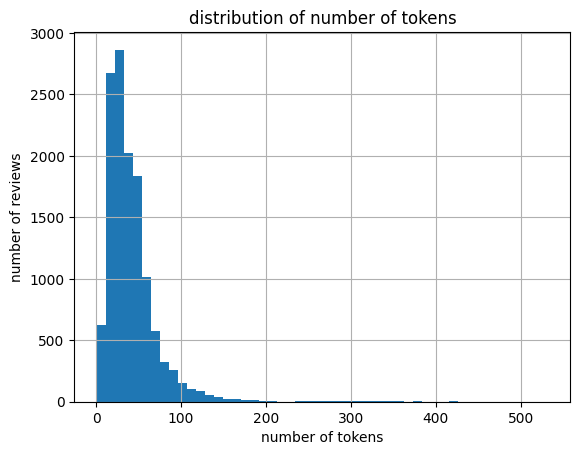

In [118]:
df.hist(column= "number_words",bins=50)
plt.xlabel("number of tokens")
plt.ylabel("number of reviews")
plt.title("distribution of number of tokens")

##### most reviews are having around 10 to 70 tokens

#### tfidf

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer= TfidfVectorizer()

In [121]:
y= vectorizer.fit_transform(df["review_cln"])

In [122]:
print(vectorizer.get_feature_names_out()[500:600])

['anybody' 'anyday' 'anymore' 'anyone' 'anything' 'anytime' 'anyway'
 'anyways' 'anywhere' 'aoife' 'aone' 'apart' 'apartment' 'apoquel'
 'apparent' 'apparently' 'appeal' 'appealed' 'appealing' 'appear'
 'appearance' 'appeared' 'appears' 'appetite' 'appetites' 'appetizing'
 'apples' 'applies' 'appointment' 'appointments' 'appooovs' 'apppealing'
 'appreciate' 'appreciated' 'appreciates' 'appreciative' 'apprehensive'
 'approach' 'approaching' 'appropriate' 'approval' 'approve' 'approved'
 'approves' 'approximately' 'appsoultulely' 'appétits' 'april' 'apso' 'ar'
 'are' 'area' 'areas' 'areat' 'arebt' 'aren' 'arent' 'arizona' 'arm'
 'arms' 'aroma' 'around' 'arrival' 'arrive' 'arrived' 'arrives'
 'arthritic' 'arthritis' 'article' 'articles' 'artificial' 'arwen' 'as'
 'asa' 'asap' 'ash' 'ashamed' 'aside' 'ask' 'asked' 'askes' 'asking'
 'asks' 'asleep' 'aspect' 'aspen' 'assigned' 'assistance' 'assisted'
 'assists' 'associated' 'assorted' 'assortment' 'assume' 'assumed'
 'assuming' 'assumption' 

In [123]:
len(vectorizer.get_feature_names_out()) # 8164 unique words

8164

In [124]:
print(y.toarray()) # array with tf-idf values for each review (in each row)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [125]:
y.shape

(12773, 8164)

In [126]:
print(y.toarray()[12772])

[0. 0. 0. ... 0. 0. 0.]


### Text Cleaning

### Lemmatization

In [127]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [128]:
# write a function to get lammatized words from a text in the form of list

def lemma_text(text):
    doc = nlp(text)
    
    lemma_words = []
    for token in doc:
        lemma_words.append(token.lemma_)
        
    return lemma_words

In [129]:
df["lemma_words"] = df["review_cln"].apply(lemma_text)

In [130]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]"
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r..."
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin..."
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard..."
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re..."


In [131]:
lemma_words = []

for lemmas in df["lemma_words"]:
    lemma_words.extend(lemmas)

In [132]:
# unique words after lemmatization

len(set(lemma_words))

7870

In [133]:
words_freq ={}

for word in lemma_words:
    if word in words_freq:
        words_freq[word]=words_freq[word]+1
    else: 
        words_freq[word] = 1

In [134]:
df_freq = pd.DataFrame({"word":list(words_freq.keys()), "frequency" : list(words_freq.values())}).sort_values(by="frequency",ascending=False)
df_freq.head(20)

,word,frequency
16,.,27208
4,be,17961
60,I,15416
72,the,14813
55,and,14116
2,my,12026
46,it,11151
48,to,11115
36,they,11060
18,a,9981


### stop words

In [135]:
spacy_stop_words = nlp.Defaults.stop_words

In [136]:
def remove_stop_words(text):
    words = [word for word in text.split() if word.lower() not in spacy_stop_words]
    new_text = " ".join(words)
    
    return new_text

In [137]:
remove_stop_words("Brand 6 are great dental treats the dog loves.  She won’t even eat breakfast before she gets her daily greenie. Her teeth are completely void of any tartar!")

'Brand 6 great dental treats dog loves. won’t eat breakfast gets daily greenie. teeth completely void tartar!'

In [138]:
df["review_wo_stop_words"] = df["review_cln"].apply(remove_stop_words)

In [139]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case..."


### POS

In [140]:
df["review_cln"]

0                                                 Cat died
1        My cat is very picky but somehow he really enj...
2         Sub Brand 3 Segment A Food was definitely wel...
3        After my dog got very sick it was hard to find...
4        I recently adopted a senior cat, he recently h...
                               ...                        
12812    My cat had bad stomach issues plus he was alle...
12813    Our dogs literally go crazy over Brand 6! With...
12814    My dog thinks these are ok: what I mean is tha...
12815    These Brand 6 Dental Chews have been the great...
12816    My little dogs love these treats they just sha...
Name: review_cln, Length: 12773, dtype: object

In [141]:
final_text = " "
for text in df["review_cln"]:
    final_text = final_text+ " "+ text

In [142]:
nlp.max_length = 3000000

In [143]:
doc_review = nlp(final_text)

In [144]:
# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc_review.count_by(spacy.attrs.POS)
POS_counts

{103: 4478,
 96: 13148,
 100: 69395,
 95: 85331,
 92: 84463,
 87: 31252,
 86: 31636,
 84: 39481,
 89: 19352,
 90: 35649,
 97: 49025,
 93: 8033,
 85: 35041,
 98: 10101,
 94: 14804,
 91: 543,
 99: 538,
 101: 179}

In [145]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc_review.vocab[k].text:{5}}: {v}')

84. ADJ  : 39481
85. ADP  : 35041
86. ADV  : 31636
87. AUX  : 31252
89. CCONJ: 19352
90. DET  : 35649
91. INTJ : 543
92. NOUN : 84463
93. NUM  : 8033
94. PART : 14804
95. PRON : 85331
96. PROPN: 13148
97. PUNCT: 49025
98. SCONJ: 10101
99. SYM  : 538
100. VERB : 69395
101. X    : 179
103. SPACE: 4478


##### pos with highest frequency : pron(pronoun): 85331, noun: 84463, verb: 69395, punct(punctuations): 49025, adj: 39481

In [151]:
doc_review[1].pos_

'PROPN'

In [158]:
for token in doc_review:
    if token.pos_ == "ADJ":
        print(token)

picky
fancy
clean
sick
hard
amazing
other
senior
bad
wrong
healthy
special
allergic
allergic
previous
long
short
other
Great
healthy
great
dental
daily
void
tartar
interested
much
expensive
special
other
fresh
acceptable
healthy
sure
Great
many
Best
other
puppy
Little
wet
dry
only
little
small
large
resealable
Good
economic
Fast
perfect
whole
perfect
glad
healthier
large
dry
other
old
faithful
great
other
unhealthy
sure
large
open
more
Great
great
nice
awesome
old
picky
weary
new
sensitive
careful
right
picky
simple
wet
lightweight
unscented
strong
more
unscented
lightweight
tidy
Fantastic
dental
favorite
expensive
bicep
right
dominant
various
lightweight
lightest
different
dusty
free
fluffy
easiest
several
easier
worth
extra
bicep
right
dominant
various
lightweight
lightest
different
dusty
free
fluffy
easiest
several
easier
worth
extra
more
picky
urinary
enough
free
older
good
worth
wonderful
BIG
happy
new
other
free
Large
great
fishy
multiple
old
favorite
top
good
long
happy
senior
m

nice
pricey
good
dental
smaller
great
healthy
renal
healthy
more
basic
exceptional
small
regular
clean
old
Perfect
healthy
good
nice
picky
soft
chewy
Havanese"s
old
more
favorite
sealable
own
expensive
excited
favorite
small
more
other
thier
clean
drier
tougher
great
excited
huge
old
sweetest
puppy
hisdilt
clean
healthy
more
good
pricey
treeth
black
small
sure
best
clean
expensive
worth
clean
healthy
good
little
high
high
dental
important
older
yellow
smaller
dental
own
Quick
reasonable
same
lazy
good
bad
first
old
good
cheaper
worth
better
smaller
Great
little
more
traditional
double
dental
worth
extra
fresh
clean
miniature
sensitive
only
upset
clean
healthy
nice
guilty
horrible
blue
red
itchy
less
blue
weird
busy
few
overall
dental
happy
best
dental
enjoyable
yummy
terrible
simple
good
simple
more
first
biggest
great
yummy
great
crazy
simple
wet
fabulous
clean
clean
little
more
dry
enough
nice
bigger
convenient
free
simple
long
perfect
perfect
different
normal
little
bigger
dry
free


### NER

In [325]:
doc_review.ents

(Siamese,
 4,
 hundred of dollars,
 two,
 the Sub Brand 3 Segment A Food,
 6,
 daily,
 Dog Chow,
 3,
 Lily,
 3,
 5,
 Goose, Basil & Ponzu,
 10 year old,
 Weimaraner,
 Accidentally,
 Brand 11,
 about 5-6,
 EVER,
 Brand 11,
 about 5-6,
 EVER,
 First,
 3,
 November,
 4,
 a couple bucks,
 K9,
 The Large Chunks of Raw Bits,
 the Brand 3 Simple,
 two,
 first,
 2.5 months to 5 years,
 five year old,
 two,
 Brand 5's,
 Love,
 Maltese,
 One,
 17,
 PinchMe,
 Kammie,
 3,
 half in the afternoon,
 two,
 Sub Brand,
 3,
 4,
 Rachael Ray,
 Petco,
 about 1 week ago,
 Amazon,
 Item,
 12,
 12,
 12,
 about 1-2 dollars,
 Manufacturer A Brand 1 LiveClear Chicken,
 Rice,
 Jormin,
 about 10,
 JRT,
 15yrs old,
 last year,
 Lung Cancer,
 Hates,
 an hour or two,
 RR,
 Muttballs,
 two,
 the Sub Brand 3 Segment A Food,
 3,
 Rice,
 4,
 the Brand 12,
 three,
 2,
 Petco,
 Momma,
 5.5months,
 Tried,
 MeowMix,
 one,
 three,
 Siberian,
 Brand 12,
 one,
 65 pound,
 Moose,
 Cats,
 the Brand 4,
 about a month,
 Bella,
 a m

In [326]:
ents_types=[]
for ents in doc_review.ents:
    ents_types.append(ents.label_)

In [327]:
set(ents_types)

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [328]:
from collections import Counter

In [329]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case..."


In [330]:
def count_ner(name_ner, top_n=15):
    ent_list = [str(ents) for ents in doc_review.ents if ents.label_==name_ner]
    ent_freq = Counter(ent_list)
    
    print(f"{name_ner}: {ent_freq.most_common(top_n)}",end ="\n\n")

In [331]:
count_ner("CARDINAL", 40)

CARDINAL: [('two', 476), ('one', 389), ('2', 361), ('3', 335), ('6', 302), ('three', 181), ('4', 147), ('5', 143), ('17', 134), ('One', 120), ('half', 73), ('1', 73), ('10', 66), ('12', 54), ('four', 49), ('#', 46), ('20', 40), ('16', 37), ('five', 27), ('22', 25), ('more than one', 22), ('Two', 21), ('9', 20), ('70', 20), ('8', 19), ('13', 18), ('7', 18), ('10/10', 15), ('15', 14), ('about 5', 14), ('Zero', 13), ('ONE', 12), ('only 3', 11), ('11', 11), ('zero', 11), ('27', 11), ('50', 10), ('18', 10), ('30', 9), ('Only one', 9)]



In [332]:
for type_ in set(ents_types):
    count_ner(type_)

MONEY: [('1', 14), ('2', 9), ('every penny', 7), ('one dollar', 5), ('less than 100#', 5), ('25.00 less', 4), ('#dog', 3), ('21 dollars', 3), ('the few extra dollars', 2), ('143#', 2), ('$', 2), ('3', 2), ('30', 2), ('38', 2), ('nearly $60', 2)]

LAW: [('Brand 6', 51), ('the Brand 6', 36), ('these Brand 6', 16), ('the Brand 3', 12), ('some Brand 6', 12), ('Brand 17', 11), ('Brand 16', 10), ('Brand 10', 9), ('Brand 4', 7), ('Brand 11', 6), ('this Brand 4', 6), ('the Brand 4', 5), ('the Simple Servings Segment A Food', 5), ('this Brand 3', 5), ('Brand 22', 5)]

QUANTITY: [('a ton', 16), ('30 pounds', 5), ('15 pounds', 4), ('5 acres', 4), ('seven 20lb', 4), ('24 pound', 4), ('almost 60 pounds', 3), ('My little 9 pound', 3), ('30 pound', 3), ('20 pounds', 3), ('10 pounds', 3), ('15 pound', 3), ('65 pound', 2), ('50 pound', 2), ('5 pound', 2)]

NORP: [('German', 70), ('Australian', 36), ('Pomeranian', 24), ('Salmon', 18), ('Maltese', 16), ('French', 15), ('Cleans', 14), ('Kitties', 10), ('S

In [333]:
keywords_list = [token.text for token in doc_review]

In [334]:
top_keywords = Counter(keywords_list)

In [335]:
list_top_keys = top_keywords.most_common(20)

In [336]:
pd.DataFrame(list_top_keys)

,0,1
0,.,27208
1,I,13966
2,and,13711
3,the,13331
4,to,11007
5,a,9729
6,it,9587
7,!,9003
8,",",8655
9,for,7099


In [337]:
def create_bigram(text):
    doc= nlp(text)
    
    bigram_list=[]
    for i in range(len(doc)):
        if (i+1) < len(doc):
            bigram_list.append(doc[i].text+" "+doc[i+1].text)
        
        
    return bigram_list
        
        

In [338]:
create_bigram("Great for our dog who suffers from many allergies.  Best we’ve found!  He prances and dances at meal time, too — something he never did with other dog food.")

['Great for',
 'for our',
 'our dog',
 'dog who',
 'who suffers',
 'suffers from',
 'from many',
 'many allergies',
 'allergies .',
 '.  ',
 '  Best',
 'Best we',
 'we ’ve',
 '’ve found',
 'found !',
 '!  ',
 '  He',
 'He prances',
 'prances and',
 'and dances',
 'dances at',
 'at meal',
 'meal time',
 'time ,',
 ', too',
 'too —',
 '— something',
 'something he',
 'he never',
 'never did',
 'did with',
 'with other',
 'other dog',
 'dog food',
 'food .']

In [339]:
df["bigrams_i"]= df["review_cln"].apply(create_bigram)

In [340]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died]
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu..."
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment..."
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic..."
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se..."


In [341]:
def create_trigram(text):
    doc= nlp(text)
    
    trigram_list=[]
    for i in range(len(doc)):
        if (i+2) < len(doc):
            trigram_list.append(doc[i].text+" "+doc[i+1].text+" "+doc[i+2].text)
        
        
    return trigram_list

In [342]:
df["trigram_i"] = df["review_cln"].apply(create_trigram)

In [343]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i,trigram_i
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died],[]
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu...","[My cat is, cat is very, is very picky, very p..."
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment...","[ Sub Brand, Sub Brand 3, Brand 3 Segment, 3 ..."
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic...","[After my dog, my dog got, dog got very, got v..."
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se...","[I recently adopted, recently adopted a, adopt..."


#### bigram frequency

In [344]:
all_bigrams_i = [bigram for bigram_list in df["bigrams_i"] for bigram in bigram_list]

In [345]:
len(all_bigrams_i)

519273

In [346]:
bigram_freq_i = Counter(all_bigrams_i)
    
pd.DataFrame(bigram_freq_i.most_common(10))

,0,1
0,. I,3899
1,I have,1628
2,. They,1557
3,it .,1496
4,! !,1476
5,.,1361
6,food .,1309
7,My dog,1297
8,for my,1195
9,this food,1169


#### trigram frequency

In [347]:
all_trigrams_i = [trigram for trigram_list in df["trigram_i"] for trigram in trigram_list]

In [348]:
trigram_freq_i = Counter(all_trigrams_i)
    
pd.DataFrame(trigram_freq_i.most_common(10))

,0,1
0,! ! !,568
1,. I have,424
2,My dog loves,422
3,this food .,369
4,. I would,354
5,. They are,346
6,I have a,292
7,. I,272
8,My cat loves,272
9,these treats .,267


### text cleaning

In [349]:
print(unique_chars)

['}', ')', '®', '💘', '$', '❣', '–', '♀', '‚', '\xa0', '¯', '-', '☺', '"', '™', '￼', ':', '🤢', '‘', '️', '“', '?', ';', "'", '\\', '😄', '♥', '☹', '😊', '’', '€', '😹', '(', '⭕', '\u200d', '%', ']', '>', ',', '`', '&', '😍', '*', '…', '🐱', '�', '\u200b', '🐕', '/', '[', '!', '😖', '😆', '+', '\x99', '🐈', '#', '@', '”', '<', '\n', '❌', '=', '🤷', '~', '—', '\x80', '👍', '❤']


#### remove special characters

In [350]:
def remove_special_chars(text):
    for char in unique_chars:
        text = text.replace(char, "")
        
    return text

In [351]:
df["cln_stop_special_char"] = df["review_wo_stop_words"].apply(remove_special_chars)

In [352]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i,trigram_i,cln_stop_special_char
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died],[],Cat died
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu...","[My cat is, cat is very, is very picky, very p...",cat picky enjoys fancy feast flavor. Hes Siame...
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment...","[ Sub Brand, Sub Brand 3, Brand 3 Segment, 3 ...",Sub Brand 3 Segment Food definitely received 4...
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic...","[After my dog, my dog got, dog got very, got v...",dog got sick hard find food have. loves food a...
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se...","[I recently adopted, recently adopted a, adopt...",recently adopted senior cat recently bad case ...


In [353]:
# check if all special characters are removed

special_chars_f = df["cln_stop_special_char"].apply(special_char)

all_sp_chars_f=list([])
for list_char in special_chars_f:
    all_sp_chars_f.extend(list_char)

In [354]:
all_sp_chars_f

[]

In [355]:
type(df["cln_stop_special_char"][0])

str

In [356]:
# remove extra space
df["cln_stop_special_char"]= df["cln_stop_special_char"].apply(lambda x: x.replace("  "," "))

#### frequency

In [357]:
df["number_words_f"] = df["cln_stop_special_char"].apply(no_of_words)

Text(0.5, 1.0, 'distribution of number of tokens')

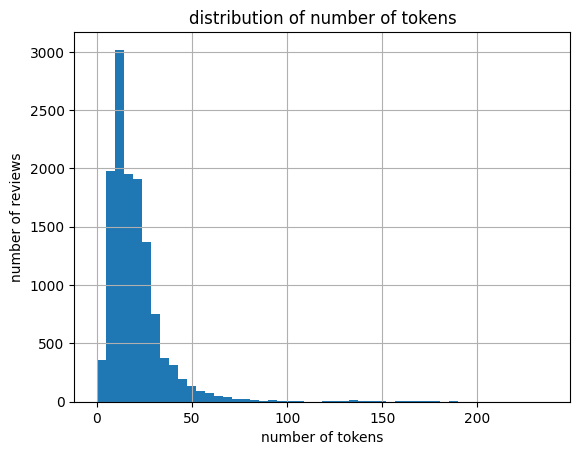

In [358]:
df.hist(column= "number_words_f",bins=50)
plt.xlabel("number of tokens")
plt.ylabel("number of reviews")
plt.title("distribution of number of tokens")

In [359]:
df["number_words_f"].mean()

20.065763720347608

In [360]:
final_text_f = ""
for text in df["cln_stop_special_char"]:
    final_text_f = final_text_f+ " "+ text

doc_review_f = nlp(final_text_f)

# Count the frequencies of different coarse-grained POS tags:
POS_counts_f = doc_review_f.count_by(spacy.attrs.POS)
#POS_counts_f

for k,v in sorted(POS_counts_f.items()):
    print(f'{k}. {doc_review_f.vocab[k].text:{5}}: {v}')

84. ADJ  : 33754
85. ADP  : 3057
86. ADV  : 12783
87. AUX  : 6122
89. CCONJ: 325
90. DET  : 647
91. INTJ : 655
92. NOUN : 81258
93. NUM  : 5830
94. PART : 3799
95. PRON : 10570
96. PROPN: 18186
97. PUNCT: 27891
98. SCONJ: 441
99. SYM  : 9
100. VERB : 50837
101. X    : 128
103. SPACE: 244


In [361]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i,trigram_i,cln_stop_special_char,number_words_f
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died],[],Cat died,2
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu...","[My cat is, cat is very, is very picky, very p...",cat picky enjoys fancy feast flavor. Hes Siame...,14
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment...","[ Sub Brand, Sub Brand 3, Brand 3 Segment, 3 ...",Sub Brand 3 Segment Food definitely received 4...,13
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic...","[After my dog, my dog got, dog got very, got v...",dog got sick hard find food have. loves food a...,17
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se...","[I recently adopted, recently adopted a, adopt...",recently adopted senior cat recently bad case ...,66


In [362]:
df["cln_stop_special_char"]=df["cln_stop_special_char"].apply(lambda x: x.lower())


In [363]:
df["cln_stop_special_char"]=df["cln_stop_special_char"].apply(lambda x: x.replace(".",""))

In [364]:
df["lemma_f"]=df["cln_stop_special_char"].apply(lemma_text)

In [365]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i,trigram_i,cln_stop_special_char,number_words_f,lemma_f
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died],[],cat died,2,"[cat, die]"
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu...","[My cat is, cat is very, is very picky, very p...",cat picky enjoys fancy feast flavor hes siames...,14,"[cat, picky, enjoy, fancy, feast, flavor, he, ..."
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment...","[ Sub Brand, Sub Brand 3, Brand 3 Segment, 3 ...",sub brand 3 segment food definitely received 4...,13,"[sub, brand, 3, segment, food, definitely, rec..."
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic...","[After my dog, my dog got, dog got very, got v...",dog got sick hard find food have loves food am...,17,"[dog, get, sick, hard, find, food, have, love,..."
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se...","[I recently adopted, recently adopted a, adopt...",recently adopted senior cat recently bad case ...,66,"[recently, adopt, senior, cat, recently, bad, ..."


In [366]:
words_f = [word_list for word_list in df["lemma_f"] ]

In [367]:
words_f

[['cat', 'die'],
 ['cat',
  'picky',
  'enjoy',
  'fancy',
  'feast',
  'flavor',
  'he',
  's',
  'siamese',
  'definitely',
  'buy',
  'again'],
 ['sub',
  'brand',
  '3',
  'segment',
  'food',
  'definitely',
  'receive',
  '4',
  'cat',
  'lick',
  'plate',
  'clean'],
 ['dog',
  'get',
  'sick',
  'hard',
  'find',
  'food',
  'have',
  'love',
  'food',
  'amazing',
  'food',
  'I',
  'm',
  'put',
  'dog'],
 ['recently',
  'adopt',
  'senior',
  'cat',
  'recently',
  'bad',
  'case',
  'diarrhea',
  'life',
  'I',
  'could',
  'not',
  'figure',
  'wrong',
  'go',
  'vet',
  'spend',
  'dollar',
  'tell',
  'healthy',
  'physically',
  'give',
  'prescription',
  'special',
  'type',
  'food',
  'do',
  'not',
  'help',
  'boy',
  'all',
  'wits',
  'end',
  'friend',
  'suggest',
  'allergic',
  'chicken',
  'thing',
  'cat',
  'turn',
  'allergic',
  'chicken',
  'protein',
  'previous',
  'food',
  'before',
  'long',
  'story',
  'short',
  'switch',
  'brand',
  '4',
  'l

In [368]:
len(words_f)

12773

In [369]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

In [370]:
# create object
tfidf = TfidfVectorizer(tokenizer= lambda doc: doc, lowercase= False)
 
# get tf-df values
result = tfidf.fit_transform(words_f)

In [371]:
result

<12773x7265 sparse matrix of type '<class 'numpy.float64'>'
	with 200194 stored elements in Compressed Sparse Row format>

In [372]:
len(tfidf.get_feature_names_out())

7265

In [373]:
from sklearn.decomposition import LatentDirichletAllocation

In [374]:
lda_model = LatentDirichletAllocation(n_components=10, max_iter=20, random_state=20)

In [375]:
X_topics = lda_model.fit_transform(result)

In [376]:
topic_words = lda_model.components_

In [377]:
X_topics

array([[0.0446523 , 0.04465629, 0.04464953, ..., 0.04465674, 0.0446547 ,
        0.04465094],
       [0.02333967, 0.02334054, 0.02333829, ..., 0.02334272, 0.02334289,
        0.02334103],
       [0.02329142, 0.02329178, 0.0232925 , ..., 0.02329224, 0.02329291,
        0.02329996],
       ...,
       [0.02145893, 0.02145977, 0.02145905, ..., 0.02146487, 0.0214657 ,
        0.80685562],
       [0.02132965, 0.0213329 , 0.0213322 , ..., 0.0213331 , 0.80801494,
        0.02133661],
       [0.02723025, 0.02722937, 0.02722952, ..., 0.02723188, 0.02723215,
        0.02723569]])

In [378]:
topic_words

array([[ 1.8987377 ,  0.1       ,  0.10000001, ...,  0.1       ,
         0.10000001,  0.1       ],
       [ 7.7455339 ,  0.1       ,  1.26568795, ...,  0.10014244,
         0.1       ,  0.1       ],
       [ 2.42860095,  0.64567882,  0.1       , ...,  0.1       ,
         0.10000001,  0.1       ],
       ...,
       [10.67249215,  0.1       ,  0.10002402, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 8.76610839,  0.1       ,  0.10000126, ...,  0.1       ,
         0.31960204,  0.1       ],
       [ 0.10000843,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.47612455]])

In [379]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 10

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(tfidf.get_feature_names_out())[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['not' 'golden' 'blue' 'do' 'love' 'its' 'eat' 'treat' 'dog']
Topic 2 ['food' 'dog' 'love' 'it' 'cat' 'year' 'puppy' 'old' 'eat']
Topic 3 ['love' 'breath' 'dog' 'tooth' 'treat' 'like' '6' 'well' 'brand']
Topic 4 ['cat' 'treat' 'reccomend' 'like' 'specific' 'not' 'eat' 'health'
 'product']
Topic 5 ['dog' 'love' 'not' 'product' 'brand' 'gassy' 'treat' 'buy' 'cat']
Topic 6 ['cat' 'love' 'treat' 'run' 'bag' 'come' 'flavor' 'shake' 'they']
Topic 7 ['cat' 'food' 'love' 'eat' 'brand' 'like' 'it' 'wet' 'not']
Topic 8 ['dog' 'not' 'treat' 'love' 'cat' 'do' 'eat' 'food' 'picky']
Topic 9 ['dog' 'litter' 'not' 'love' 'treat' 'do' 'like' 'cat' 'they']
Topic 10 ['dog' 'love' 'tooth' 'breath' 'treat' 'help' 'good' 'clean' 'great']


In [380]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(result)  

topic_list = []
# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    topic_list.append(topic_doc)
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

Document 1  -- Topic: 3
Document 2  -- Topic: 6
Document 3  -- Topic: 6
Document 4  -- Topic: 1
Document 5  -- Topic: 1
Document 6  -- Topic: 1
Document 7  -- Topic: 9
Document 8  -- Topic: 6
Document 9  -- Topic: 8
Document 10  -- Topic: 6
Document 11  -- Topic: 2
Document 12  -- Topic: 5
Document 13  -- Topic: 5
Document 14  -- Topic: 1
Document 15  -- Topic: 6
Document 16  -- Topic: 1
Document 17  -- Topic: 1
Document 18  -- Topic: 8
Document 19  -- Topic: 7
Document 20  -- Topic: 5
Document 21  -- Topic: 1
Document 22  -- Topic: 6
Document 23  -- Topic: 9
Document 24  -- Topic: 5
Document 25  -- Topic: 1
Document 26  -- Topic: 6
Document 27  -- Topic: 8
Document 28  -- Topic: 9
Document 29  -- Topic: 8
Document 30  -- Topic: 1
Document 31  -- Topic: 6
Document 32  -- Topic: 1
Document 33  -- Topic: 6
Document 34  -- Topic: 6
Document 35  -- Topic: 6
Document 36  -- Topic: 8
Document 37  -- Topic: 6
Document 38  -- Topic: 6
Document 39  -- Topic: 1
Document 40  -- Topic: 6
Document 

In [381]:
df["topic_name"] = topic_list

In [382]:
df.head()

,upc,vendor,brand,sub_brand,category,segment,review,review_title,review_rating,review_website,review_data,review_data_created,review_id,verified,product_id,owner,base_size,c_flavors,c_form,c_lifestage,c_price_class,run_date,review_cln,no_of_sents,review_size,special_chars,number_words,lemma_words,review_wo_stop_words,bigrams_i,trigram_i,cln_stop_special_char,number_words_f,lemma_f,topic_name
0,UPC 1,Manufacturer A,Brand 1,Sub Brand 1,Category 1,Segment A,Cat died,No help,2,Amazon,2018-01-21,2018-01-21,f5c0dc82642c66562e0afbc111cf06d1,True,12231,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,Cat died,1,short,[],2,"[Cat, die]",Cat died,[Cat died],[],cat died,2,"[cat, die]",3
1,UPC 2,Manufacturer A,Brand 2,Sub Brand 2,Category 1,Segment A,My cat is very picky but somehow he really enj...,My cat is very,5,Petsmart,2022-03-27,2022-03-27,612ae4614ca4d8b091110becc822777a,False,16988,My Product,3 Ounce,Other Fish Seafood,Loaf,Adult,Super Premium,2022-04-10,My cat is very picky but somehow he really enj...,2,long,[’],26,"[my, cat, be, very, picky, but, somehow, he, r...",cat picky enjoys fancy feast flavor. He’s Siam...,"[My cat, cat is, is very, very picky, picky bu...","[My cat is, cat is very, is very picky, very p...",cat picky enjoys fancy feast flavor hes siames...,14,"[cat, picky, enjoy, fancy, feast, flavor, he, ...",6
2,UPC 3,Manufacturer B,Brand 3,Sub Brand 3,Category 1,Segment A,[This review was collected as part of a promot...,My cats loved this product!,4,Walmart,2017-12-06,2017-12-06,25bbe8da4ac7f8a1dddcbd85f1b538ed,False,18039,Competitor,1.3 Ounce,Chicken,Loaf,Adult,Premium,2022-04-10,Sub Brand 3 Segment A Food was definitely wel...,2,long,[!],22,"[ , Sub, Brand, 3, Segment, A, Food, be, defin...",Sub Brand 3 Segment Food definitely received 4...,"[ Sub, Sub Brand, Brand 3, 3 Segment, Segment...","[ Sub Brand, Sub Brand 3, Brand 3 Segment, 3 ...",sub brand 3 segment food definitely received 4...,13,"[sub, brand, 3, segment, food, definitely, rec...",6
3,UPC 4,Manufacturer A,Brand 1,Sub Brand 4,Category 2,Segment B,After my dog got very sick it was hard to find...,Review by Lori420,5,Tractorsupply,2019-08-08,2019-08-08,9dcbf87968ee3393429d550a10c5771f,False,12194,My Product,35 Pound,Lamb,Not Applicable,Adult,Super Premium,2022-04-10,After my dog got very sick it was hard to find...,3,long,['],37,"[after, my, dog, get, very, sick, it, be, hard...",dog got sick hard find food have. loves food a...,"[After my, my dog, dog got, got very, very sic...","[After my dog, my dog got, dog got very, got v...",dog got sick hard find food have loves food am...,17,"[dog, get, sick, hard, find, food, have, love,...",1
4,UPC 5,Manufacturer C,Brand 4,Sub Brand 5,Category 1,Segment C,"I recently adopted a senior cat, he recently h...",A life saver!,5,Petco,2018-11-25,2018-11-25,e0f7123bb3a1d618c127c07f6f1af020,False,21423,Competitor,11.5 Pound,Salmon,Not Applicable,Adult,Ultra,2022-04-10,"I recently adopted a senior cat, he recently h...",7,long,"[,, ,, ,, ', ,, ', ', !, ,, !, ,, ', !, ', !]",151,"[I, recently, adopt, a, senior, cat, ,, he, re...","recently adopted senior cat, recently bad case...","[I recently, recently adopted, adopted a, a se...","[I recently adopted, recently adopted a, adopt...",recently adopted senior cat recently bad case ...,66,"[recently, adopt, senior, cat, recently, bad, ...",1


In [383]:
df[["lemma_f","topic_name"]].head(20)

,lemma_f,topic_name
0,"[cat, die]",3
1,"[cat, picky, enjoy, fancy, feast, flavor, he, ...",6
2,"[sub, brand, 3, segment, food, definitely, rec...",6
3,"[dog, get, sick, hard, find, food, have, love,...",1
4,"[recently, adopt, senior, cat, recently, bad, ...",1
5,"[maltese, puppy, transition, food, breeder, fo...",1
6,"[great, treat, dog, love, healthy, option, treat]",9
7,"[cat, love, sub, brand, 3, segment, food, gave...",6
8,"[brand, 6, great, dental, treat, dog, love, wi...",8
9,"[its, ok, fine, eat, it, ant, will, not, know,...",6


In [1]:
df.head()

NameError: name 'df' is not defined

In [170]:
def text_clean(text):
    
    text = text.replace("This review was collected as part of a promotion","")
    doc = nlp(text) #tokenization
    
    # stop words removal
    words = [token.text for token in doc if token.text.lower() not in spacy_stop_words] 
    new_text = " ".join(words)
    
    # remove special characters
    for char in unique_chars:
        new_text = new_text.replace(char, "")
     
    doc2 = nlp(new_text)
    # select important part of speech
    text_words = []
    for token in doc2:
        if token.pos_ in ("ADJ", "NOUN", "PROPN", "VERB"):
            text_words.append(token.text)
            
    text_words = " ".join(text_words)
    
    return text_words
            

In [171]:
text_clean("It's Ok, fine, they eat it, ants wont. I know its short on MEAT and barely even ''food'' with all the preservatives ... but they eat it and are not interested in much else (expensive and special or not) They wont eat other things. even fresh chicken!! so ... It's acceptable as these things go")

'fine eat ants know short MEAT food preservatives eat interested expensive special eat things fresh chicken acceptable things'

In [ ]:
It's Ok, fine, they eat it, ants wont. I know its short on MEAT and barely even ''food'' with all the preservatives ... 
but they eat it and are not interested in much else (expensive and special or not) They wont eat other things. even fresh 
chicken!! so ... It's acceptable as these things go


In [172]:
text_clean("[This review was collected as part of a promotion.] The biggest test with wet food is getting a stubborn cat to eat it. If she starts choking down, then it's a success. So far, I've found one brand she somewhat likes. But the MeowMix? She ate her entire bowl in one go. The other cats didn't even get a chance to finish her portion. Definitely a brand I will buy consistently from now on!")

'biggest test wet food getting stubborn cat eat starts choking success found brand likes MeowMix ate entire bowl cats chance finish portion brand buy'